<a href="https://colab.research.google.com/github/simionattovini/hydraulic-machines/blob/main/Test%20Solutions/P1_MHB_2s2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Máquinas Hidráulicas B - P1 - 2s2024

## Enunciado

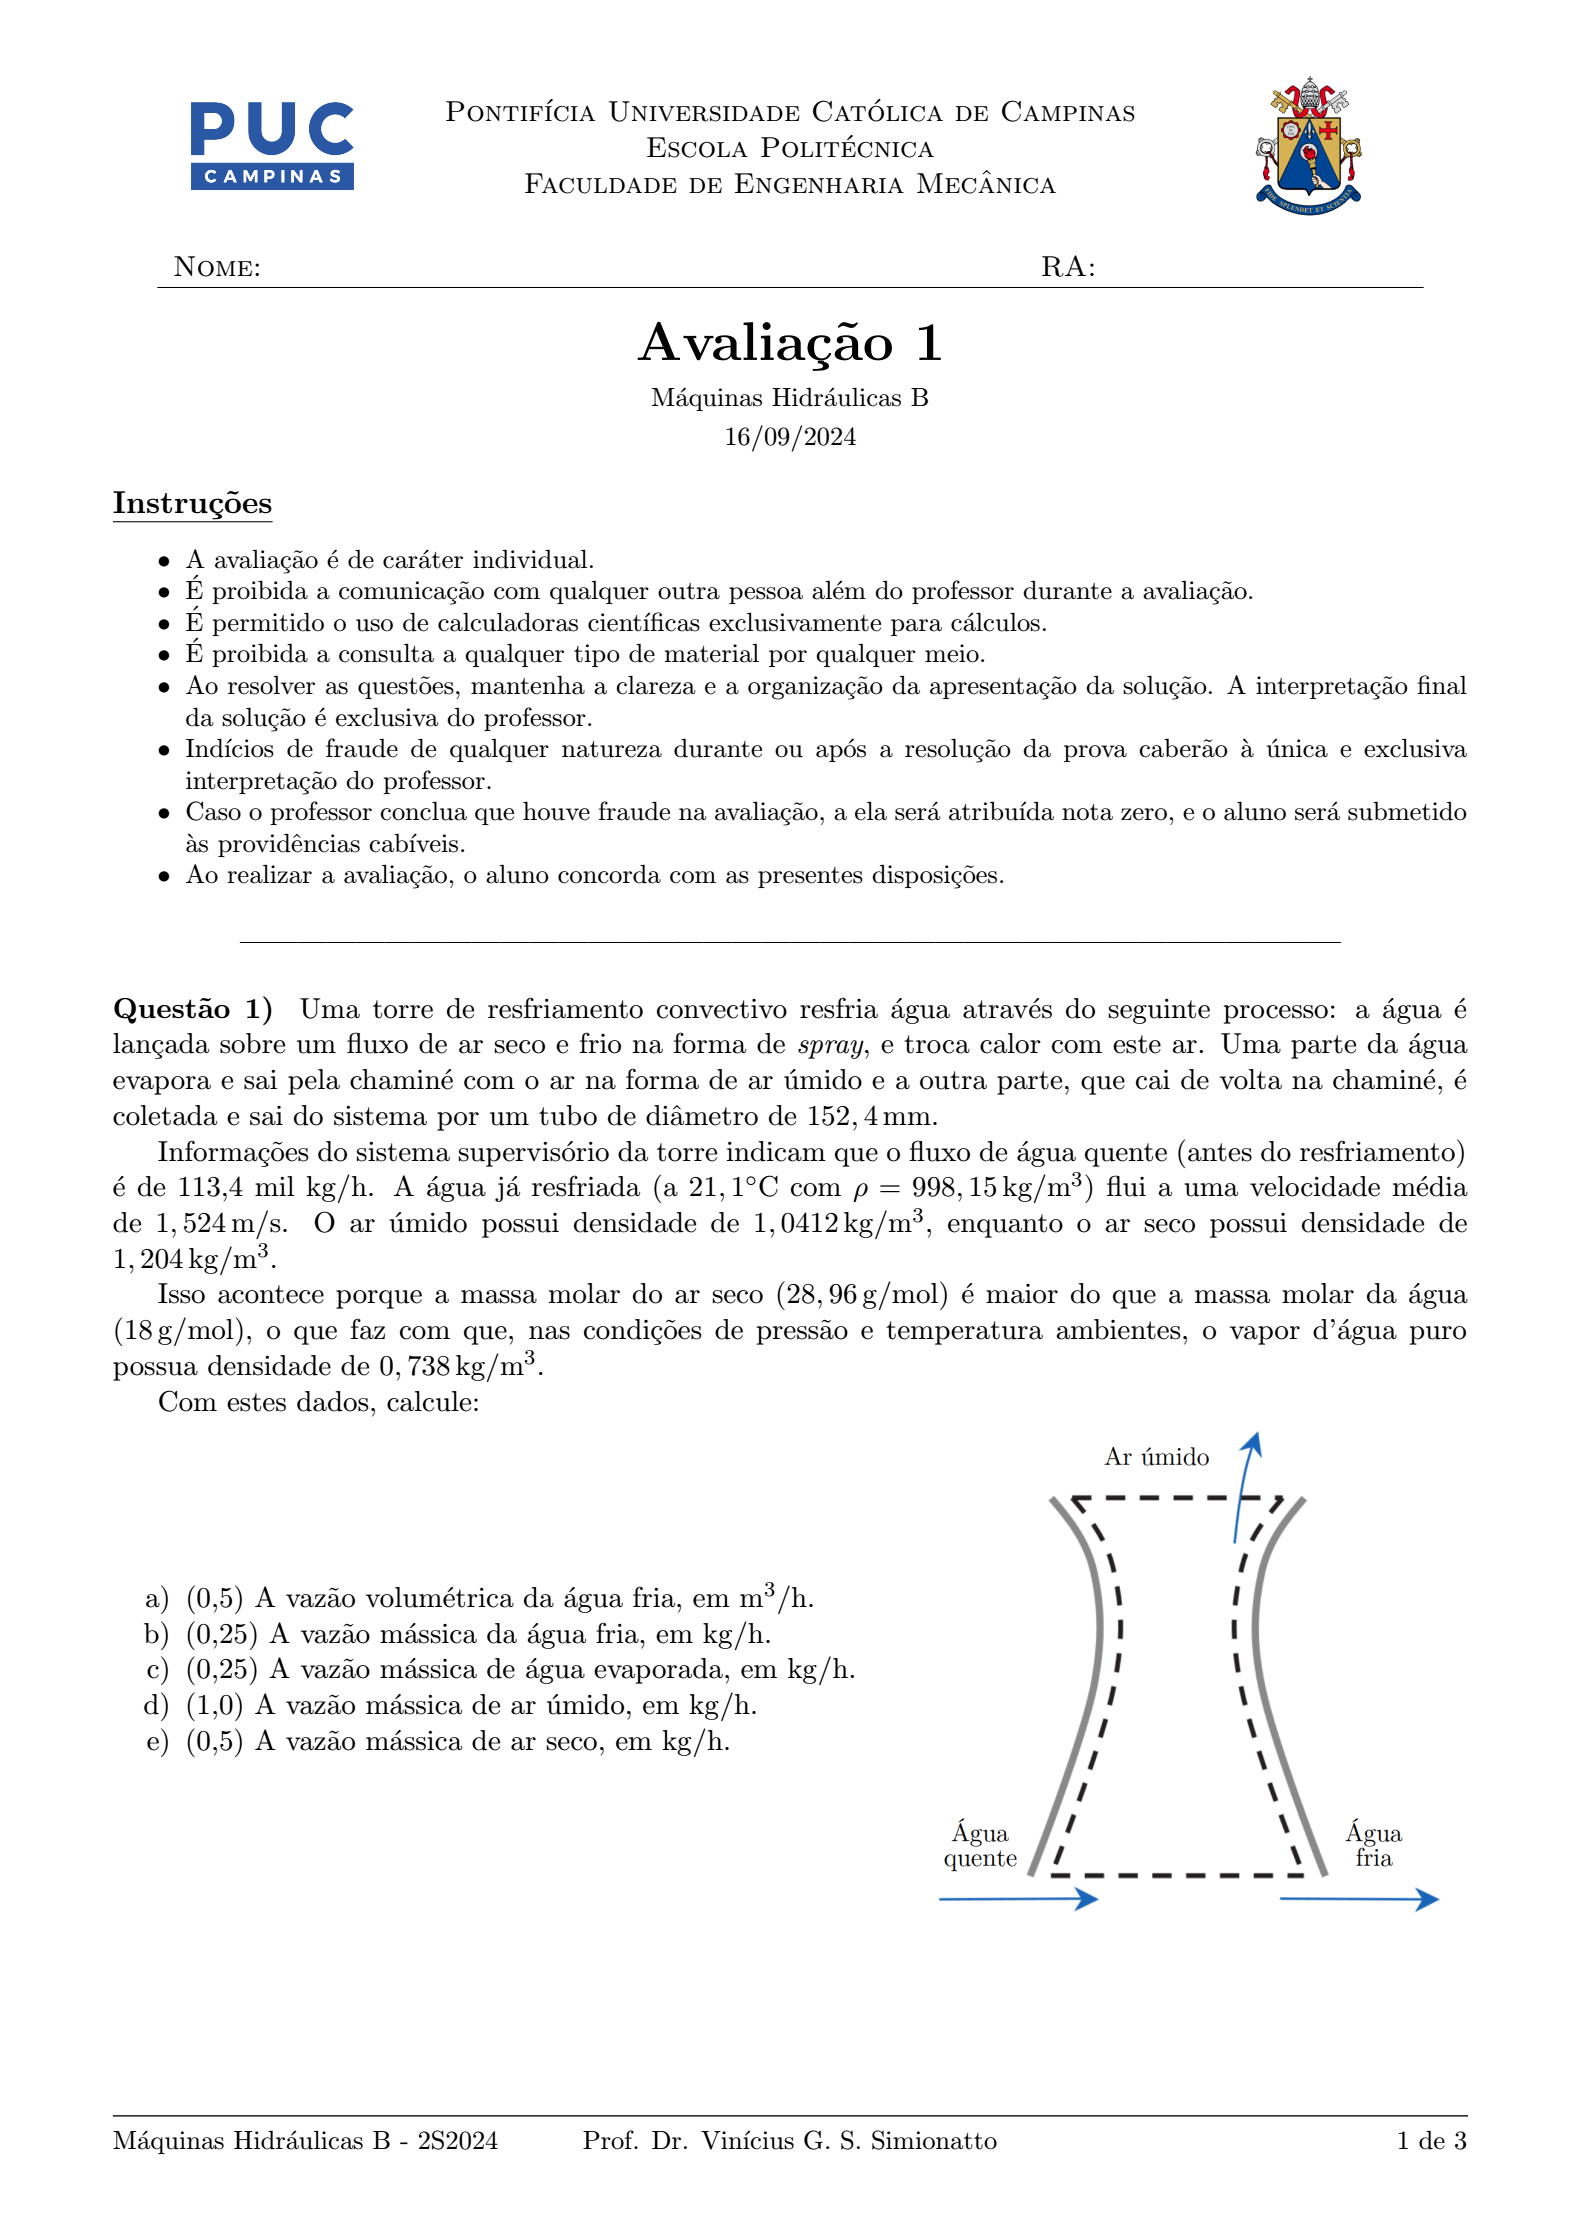

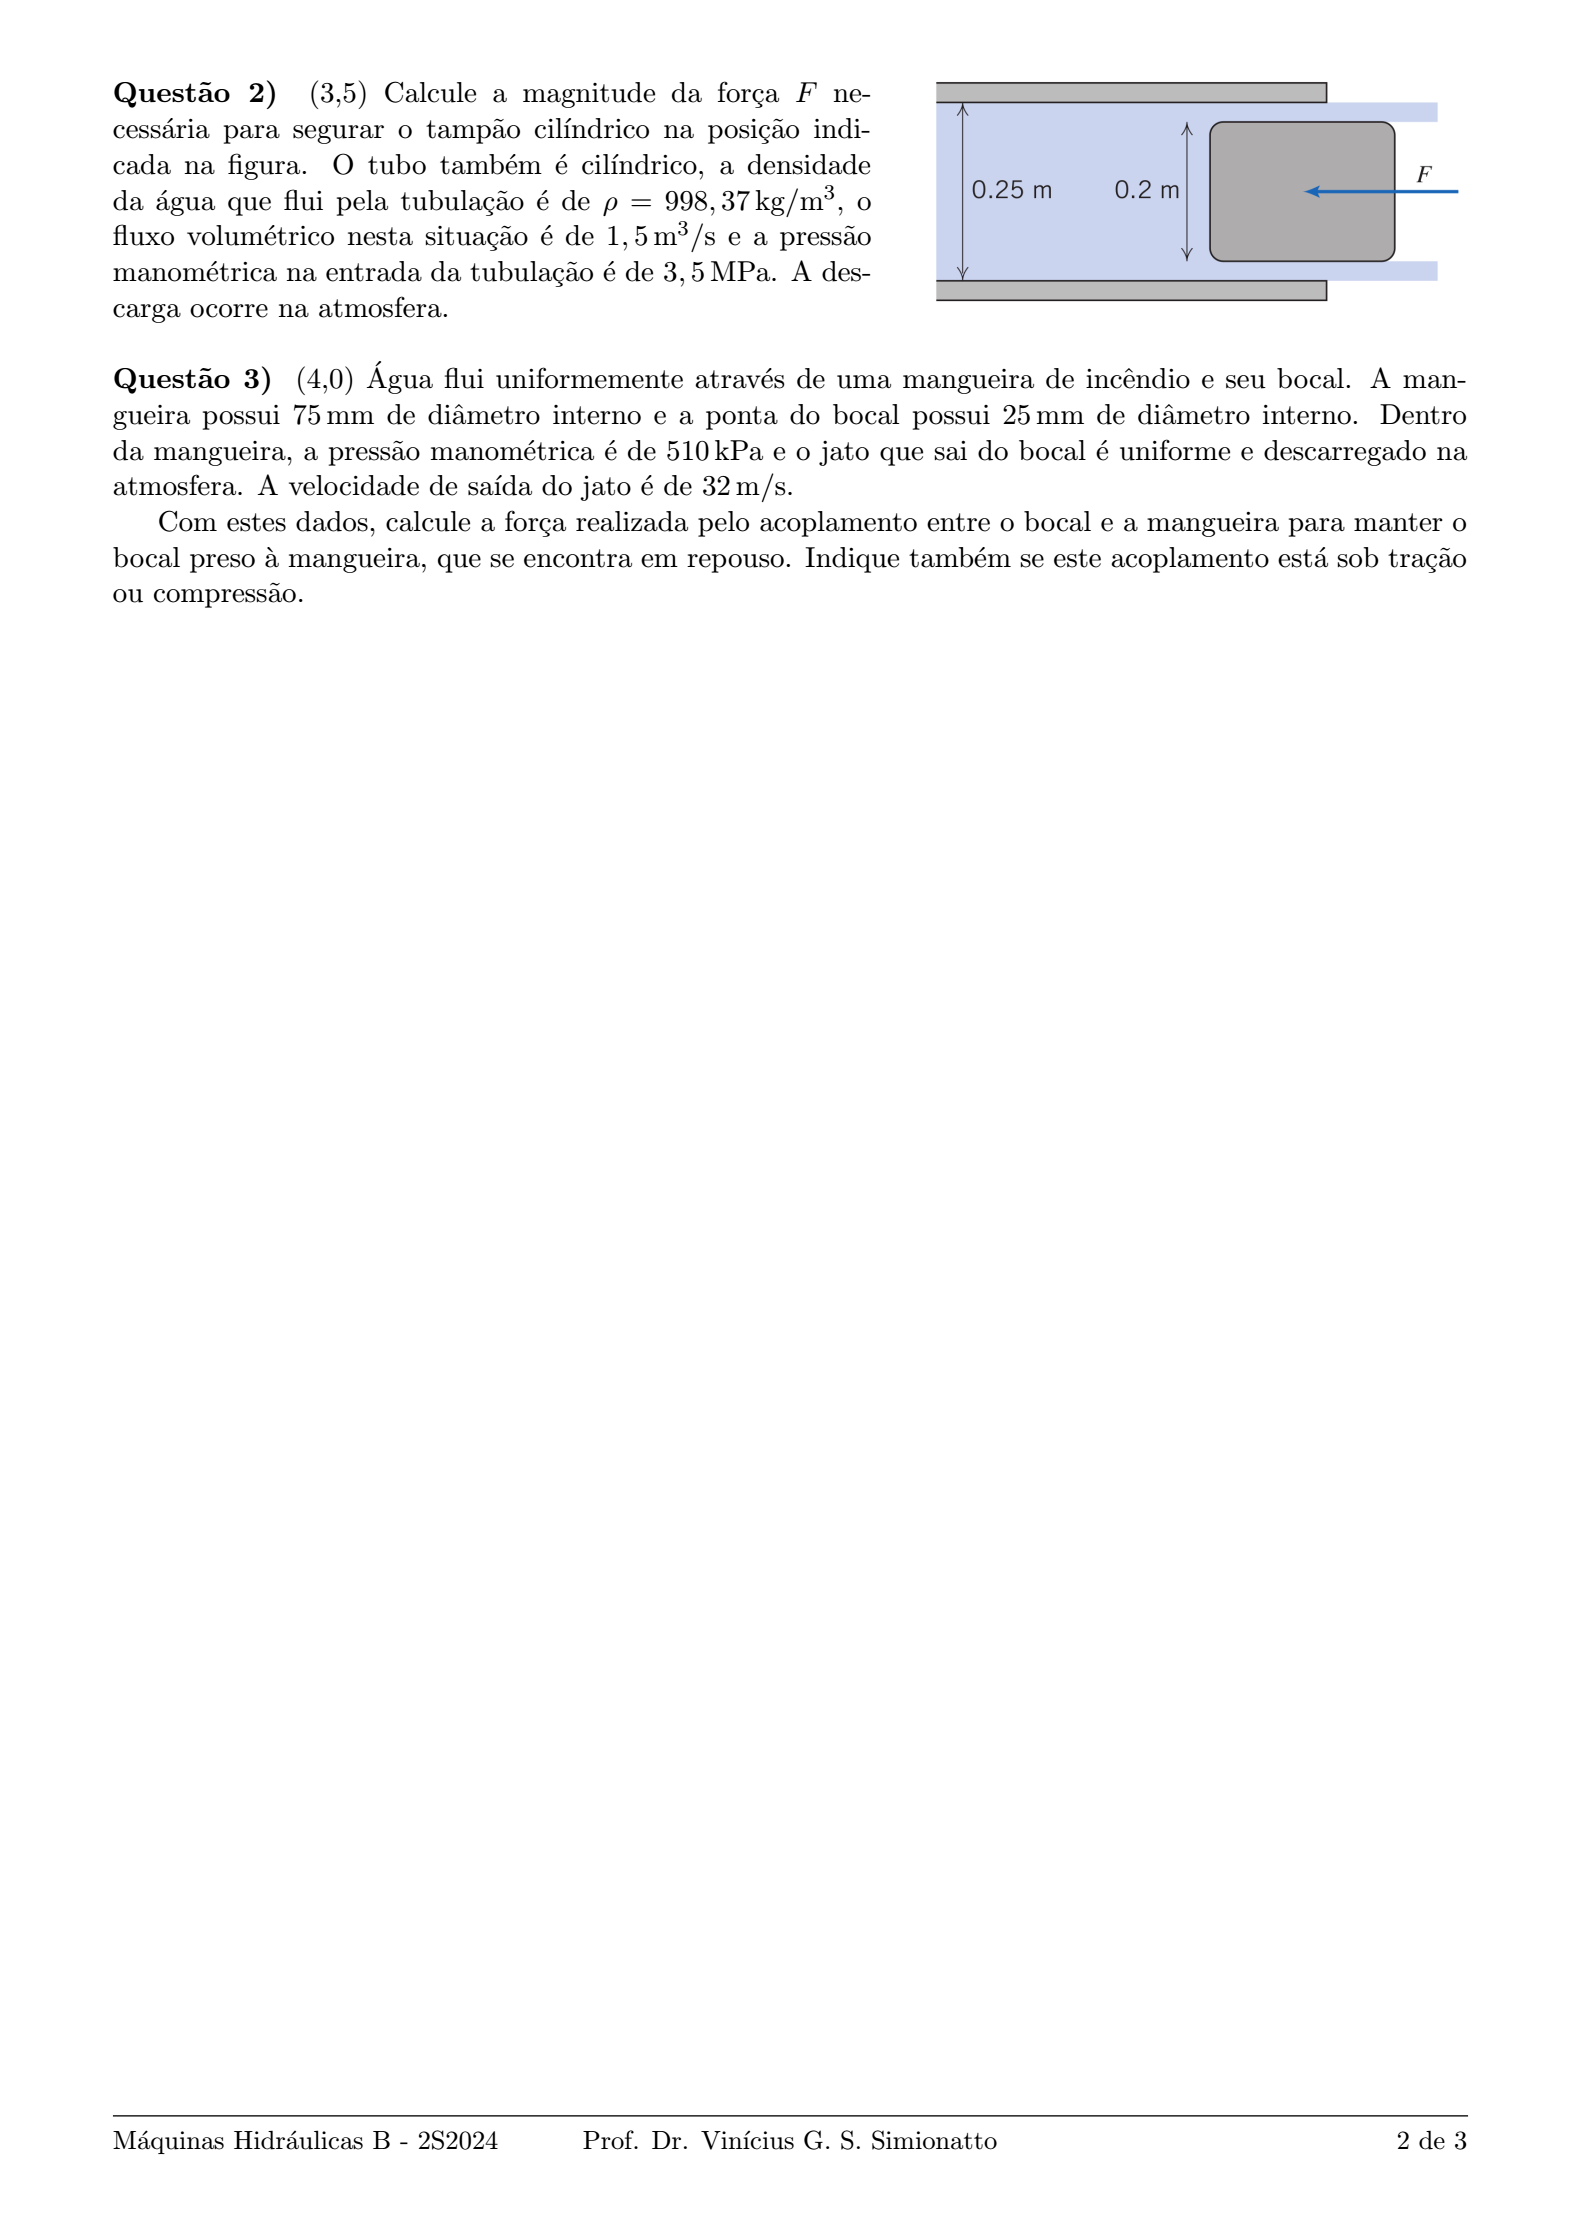

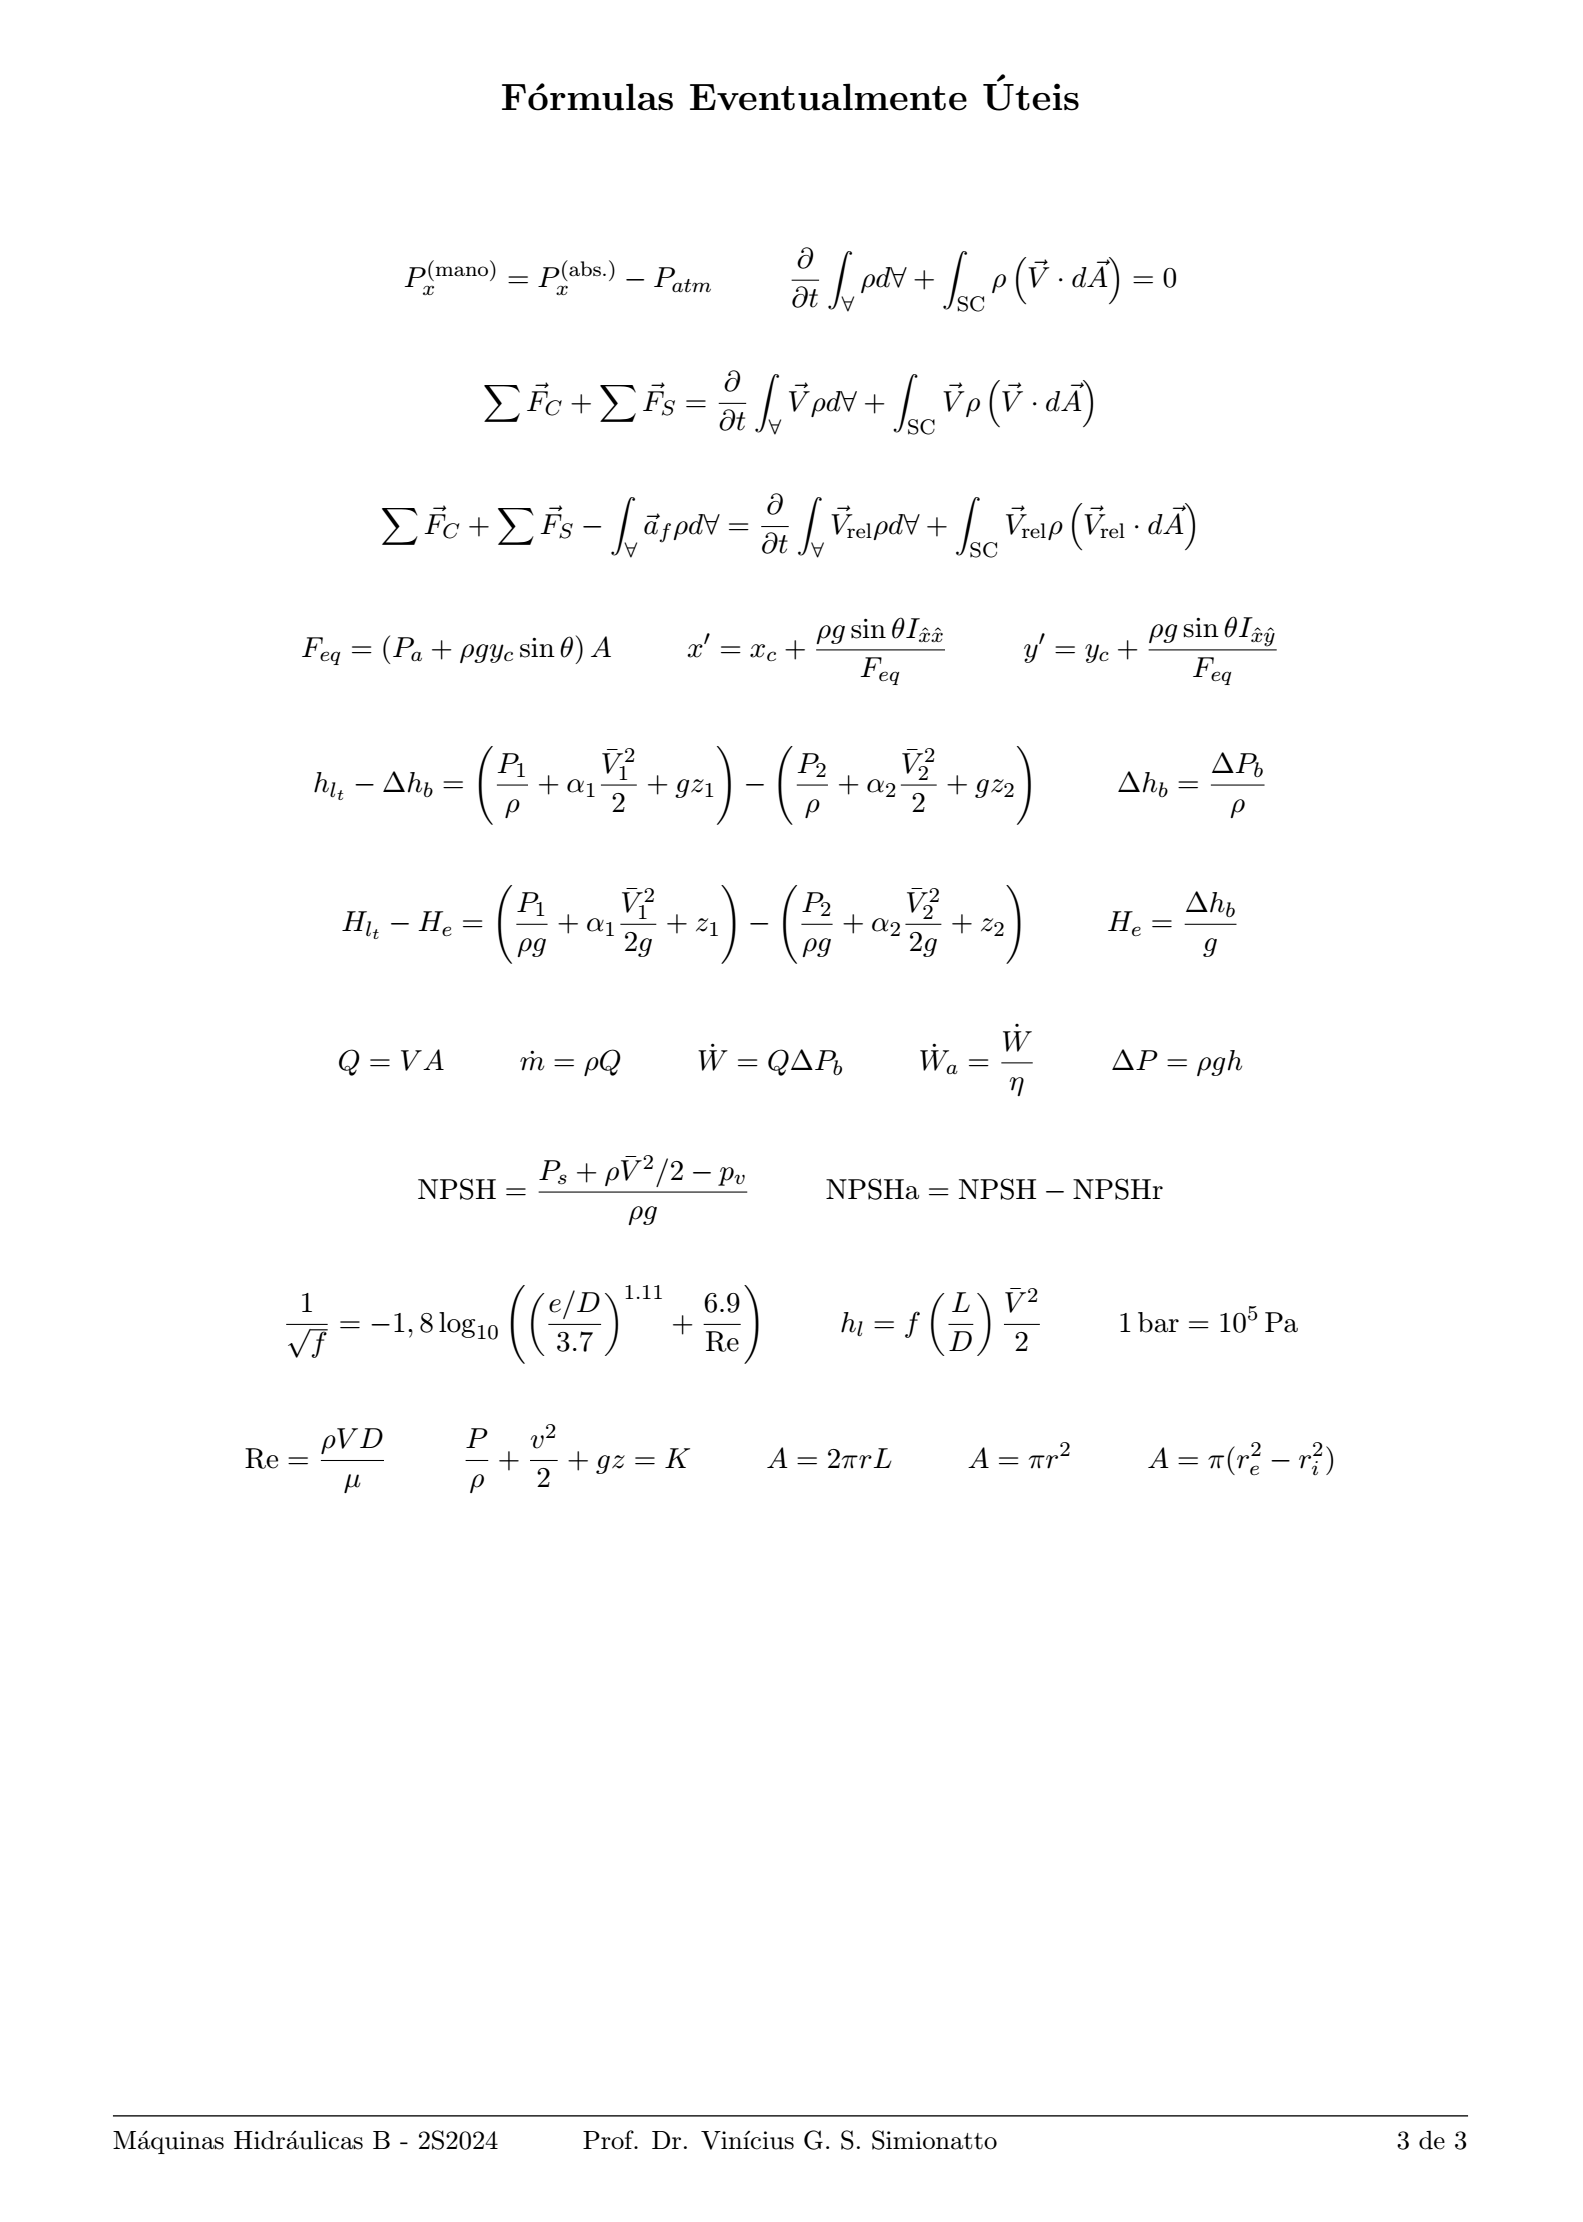

## Solução

### Questão 1.a)

A água fria flui a uma velocidade de $1,524\,\mathrm{m/s}$ por uma tubulação de diâmetro de $152,4\,\mathrm{mm}$. Assim, a vazão é dada por:

$$
Q = V.A = 0,0182 \,\mathrm{m^3/s} \hspace{5mm}\text{ ou }\hspace{5mm} 100,08 \,\mathrm{m^3/h}
$$

In [ ]:
# Q1.a)

from numpy import pi

D = 0.1524      # m
V_fria = 1.524  # m/s

A_fria = pi*(D**2)/4

Q_fria = V_fria*A_fria

print(f'Área = {A_fria:.4f} m²')
print(f'Vazão de água fria: {Q_fria:.4f} m³/s ou {Q_fria*3600:.2f} m³/h')

Área = 0.0182 m²
Vazão de água fria: 0.0278 m³/s ou 100.08 m³/h


### Questão 1.b)

A vazão mássica é dada por:

$$
\dot{m} = \rho Q = 27,75\,\mathrm{kg/s} \hspace{5mm} \text{ou} \hspace{5mm} 99894,85\,\mathrm{kg/h}
$$


In [ ]:
# Q1.b)

rho_fria = 998.15  # kg/m³

dm_fria = rho_fria*Q_fria

print(f'Vazão mássica de água fria: {dm_fria:.2f} kg/s ou {dm_fria*3600:.2f} kg/h ')

Vazão mássica de água fria: 27.75 kg/s ou 99894.85 kg/h 


### Questão 1.c)

A vazão mássica de água evaporada é a diferença entre a vazão mássica de água quente de entrada e a vazão mássica de água fria de saída, que é de $113.400\,\mathrm{kg/h}$ - $99.894,85\,\mathrm{kg/h} = 13.506,16\,\mathrm{kg/h}$.

### Questão 1.d)

Para um volume de ar úmido $V$, pode-se dizer que uma parte dele é ocupado por vapor d'água puro ($V_v = \alpha V$, com $0<\alpha<1$) e a parte restante é ocupada pelo ar seco ($V_{ar} = (1-\alpha) V$). Assim, a massa de cada componente neste volume é dada por:

$$
m_{ar} = \rho_{ar} V_{ar} = 1,204 \frac{\mathrm{kg}}{\mathrm{m^3}} \alpha V
$$

$$
m_{v} = \rho_{v} V_{v} = 0,738 \frac{\mathrm{kg}}{\mathrm{m^3}} (1-\alpha) V
$$

Já a densidade do ar úmido ($\rho_m$) é calculada pela soma das massas de ar seco e água divididas pelo volume correspontente:

$$
\rho_m = 1,0412 \frac{\mathrm{kg}}{\mathrm{m^3}} = \frac{m_{ar} + m_v}{V} = \alpha \left(1,204 \frac{\mathrm{kg}}{\mathrm{m^3}}\right) + (1-\alpha)0,738 \frac{\mathrm{kg}}{\mathrm{m^3}}
$$

Assim se calcula $\alpha = 0,650644$

In [ ]:
alpha = (1.0412-0.738)/(1.204-0.738)

print(f'alpha = {alpha:.6f}')

alpha = 0.650644


Portanto, o volume ocupado pela água na mistura é de $V_v = (1-\alpha)V$, o que faz com que a quantidade de água na mistura seja de $\rho_v^{(mix)}=\rho_v V_v /V= 257,82\,\mathrm{g/m^3}$

_OBS:Este dado está fora da realidade, pois a densidade do vapor fornecida é muito maior do que a real. Porém, o método de cálculo está correto._


In [ ]:
rho_v_mix = 0.738*(1-alpha)

print(f'Densidade de água no ar úmido: {1000*rho_v_mix:.2f} g/m³')

Densidade de água no ar úmido: 257.82 g/m³


Como a vazão de água evaporada é de $13.506,15\,\mathrm{kg/h}$, a vazão volumétrica de ar úmido será de:

$$
Q_m = \frac{\dot{m}_{evap}}{\rho_v^{(mix)}} = 52.384,97\,\mathrm{m^3/h}
$$

Assim, a vazão mássica de ar úmido é $\rho_m Q_m =  54544.27 \,\mathrm{kg/h}$

In [ ]:
dm_evap = 13506.15 # kg/h

Qm = dm_evap/rho_v_mix

print(f'Vazão volumétrica de ar úmido: {Qm:.2f} m^3/h')

Vazão volumétrica de ar úmido: 52384.97 m^3/h


# Questão 1.e)

A densidade de ar seco na mistura é dada por $\rho_{ar}^{(mix)} = \rho_{ar} V_{ar}/V= 0,7834\,\mathrm{kg/m^3}$

Por isso, a vazão mássica de ar seco será de $\dot{m}_{ar\,seco}=\rho_{ar}^{(mix)}Q_m = 41.037,08\,\mathrm{kg/h}$

In [ ]:
rho_ar_mix = 1.204*alpha

print(f'Densidade de ar seco no ar úmido: {rho_ar_mix:.4f} kg/m³')

dm_ar_seco = rho_ar_mix*Qm

print(f'Vazão mássica de ar seco: {dm_ar_seco:.2f} kg/h')


Densidade de ar seco no ar úmido: 0.7834 kg/m³
Vazão mássica de ar seco: 41037.08 kg/h


---

### Questão 2)

Observe a figura a seguir:

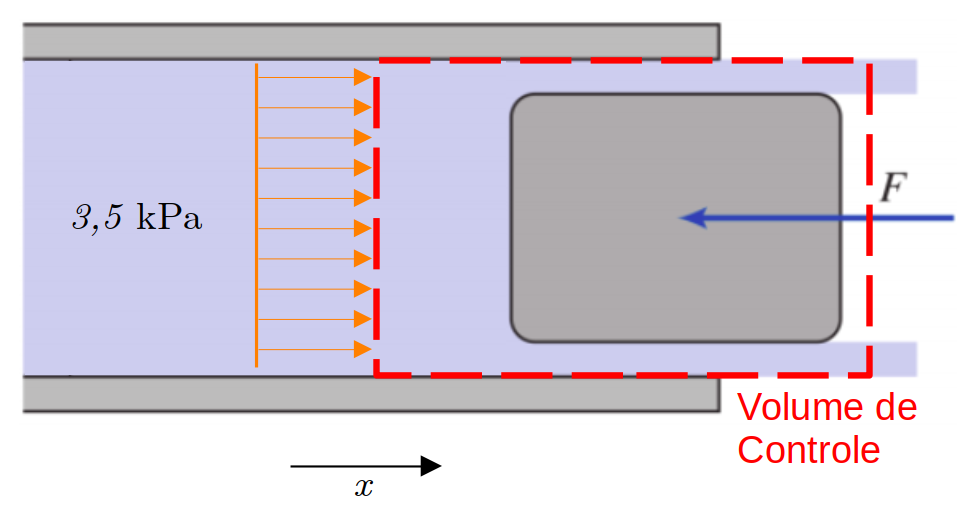

Para resolver o problema, aplica-se sobre o volume de controle em vermelho na figura a equação da conservação da quantidade de movimento apenas na direção $x$:

$$
\sum F_c + \sum F_s = \frac{\partial}{\partial t} \int_{\forall} V_x \rho d\forall + \int_{SC} V_x \rho \left(\vec{V} \cdot d\vec{A}\right)
$$

 - O termo $\sum F_c$ representa a somatória das forças de corpo, que é nula na direção $x$.
 - O termo $\sum F_s$ representa a somatória das forças de superfície, que é dada por $-F+(3,5\,\mathrm{MPa})A_{tubo}$
 - O termo $\frac{\partial}{\partial t} \int_{\forall} V_x \rho d\forall$ é nulo pois o volume de controle se encontra em regime.
 - O termo $\int_{SC} V_x \rho \left(\vec{V} \cdot d\vec{A}\right)$ contabiliza a passagem de fluido pelas superfícies direita e esquerda do volume de controle, e é dado por:

$$
\int_{SC} V_x \rho \left(\vec{V} \cdot d\vec{A}\right) = -\rho V_1^2 A_{tubo} + \rho V_2^2(A_{tubo}-A_{tamp})
$$

A velocidade $V_1$ é a velocidade de entrada do fluido no volume de controle, enquanto a velocidade $V_2$ é a de saída. Pela lei da conservação da massa, para um fluido incompressível, tem-se:

$$
V_1 A_{tubo} = V_2 (A_{tubo}-A_{tamp}) \hspace{5mm} \therefore \hspace{5mm} V_2 = \frac{V_1 A_{tubo}}{A_{tubo}-A_{tamp}}
$$

Sendo que $V_1 = Q/A_{tubo}$.

Assim, substituindo na equação original:

$$
-F+(3,5\,\mathrm{MPa})A_{tubo} = -\rho V_1^2 A_{tubo} + \rho V_2^2(A_{tubo}-A_{tamp})
$$

Reorganizando:

$$
F = \rho V_1^2 A_{tubo} - \rho V_2^2(A_{tubo}-A_{tamp}) + (3,5\,\mathrm{MPa})A_{tubo}
$$

Substituindo os valores fornecidos, calcula-se:

$$
F = 90.451,34\,\mathrm{N}
$$

In [ ]:
# Q2)

from numpy import pi

# Dados:

Q = 1.5        # m³/s
rho = 998.37   # kg/m³
P = 3.5e6      # Pa

D_tubo = 0.25  # m
D_tamp = 0.2   # m

# Resolução:

A_tubo = pi*(D_tubo**2)/4
A_tamp = pi*(D_tamp**2)/4

V1 = Q/A_tubo
V2 = V1*A_tubo/(A_tubo-A_tamp)

F = rho*(V1**2)*A_tubo - rho*V2**2*(A_tubo-A_tamp) + P*A_tubo

print(f'V1 = {V1:.2f} m/s')
print(f'V2 = {V2:.2f} m/s')
print(f'F = {F:.2f} N')

V1 = 30.56 m/s
V2 = 84.88 m/s
F = 90451.34 N


### Questão 3)

Para a solução do problema, observe a figura a seguir:

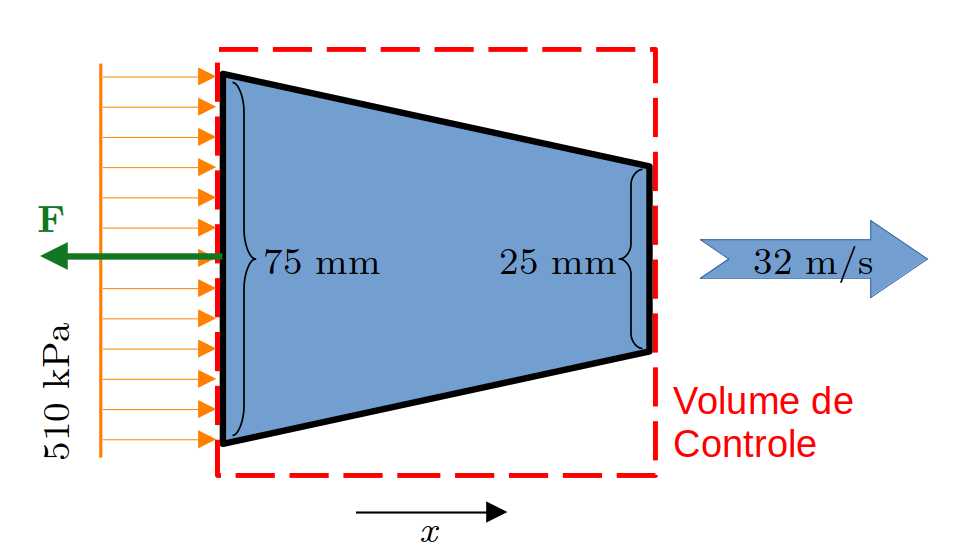

O bocal da mangueira foi envolto pelo volume de controle, em vermelho. Na superfície do volume de controle, inseriu-se a força $F$ em verde, de forma que no sentido adotado, o dispositivo de fixação do bocal estaria em tração.

Aplica-se então o princípio da conservação da quantidade de movimento na direção $x$:


$$
\sum F_c + \sum F_s = \frac{\partial}{\partial t} \int_{\forall} V_x \rho d\forall + \int_{SC} V_x \rho \left(\vec{V} \cdot d\vec{A}\right)
$$

 - O termo $\sum F_c$ representa a somatória das forças de corpo, que é nula na direção $x$.
 - O termo $\sum F_s$ representa a somatória das forças de superfície, que é dada por $-F+(510\,\mathrm{kPa})A_{1}$
 - O termo $\frac{\partial}{\partial t} \int_{\forall} V_x \rho d\forall$ é nulo pois o volume de controle se encontra em regime.
 - O termo $\int_{SC} V_x \rho \left(\vec{V} \cdot d\vec{A}\right)$ contabiliza a passagem de fluido pelas superfícies direita e esquerda do volume de controle, e é dado por:

$$
\int_{SC} V_x \rho \left(\vec{V} \cdot d\vec{A}\right) = -\rho V_1^2 A_1 + \rho V_2^2 A_2
$$

A velocidade $V_1$ é a velocidade de entrada do fluido na tubulação, e a velocidade $V_2 = 32\,\mathrm{m/s}$ é a de saída. Assim, pode-se calcular a velocidade $V_1$ com o princípio da conservação da massa:

$$
V_1 = \frac{V_2 A_2}{A_1}
$$

Assim, substituindo todos os termos na equação inicial, se obtém:

$$
-F+(510\,\mathrm{kPa})A_{1} = -\rho V_1^2 A_1 + \rho V_2^2 A_2
$$

Reorganizando:

$$
F = \rho V_1^2 A_1 - \rho V_2^2 A_2 + (510\,\mathrm{kPa})A_{1}
$$

Substituindo os valores fornecidos:

$$
F = 1.807,03\,\mathrm{N}
$$


In [ ]:
# Q3)

from numpy import pi

# Dados:

P = 510e3             # Pa
V2 = 32               # m/s
rho = 998.37          # kg/m³
A1 = pi*(0.075**2)/4  # m²
A2 = pi*(0.025**2)/4  # m²

# Resolução:

V1 = V2*A2/A1

F = rho*(V1**2)*A1 - rho*(V2**2)*A2 + P*A1

print(f'F = {F:.2f} N')

F = 1807.03 N


Como o valor da força deu positivo, o dispositivo de fixação está em ***tração*** conforme o assumido.